In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [3]:
def draw_margins(sv,X,y,ax=None):
    sv.fit(X,y)
    print 'gamma ',sv.intercept_[0]/norm(sv.coef_)
    xi = np.linspace(X[:,0].min(),X[:,0].max(),100)
    if ax is None: fig,ax=subplots()
    ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='gray',marker='o',alpha=.3)
    ax.plot(sv.support_vectors_[:,0],sv.support_vectors_[:,1],'ko',markersize=20,alpha=.2)
    ax.plot(xi,-sv.coef_[0,0]/sv.coef_[0,1]*xi- sv.intercept_/sv.coef_[0,1],'k',lw=3.)
    margin = np.linalg.norm(sv.coef_)
    ax.plot(xi,-sv.coef_[0,0]/sv.coef_[0,1]*xi- (sv.intercept_+margin/2.)/sv.coef_[0,1],'--k',lw=3.)
    ax.plot(xi,-sv.coef_[0,0]/sv.coef_[0,1]*xi- (sv.intercept_-margin/2.)/sv.coef_[0,1],'--k',lw=3.)
    print len(sv.support_)


In [4]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2,
                  cluster_std=.5,random_state=0)

In [5]:
sv = SVC(kernel='linear')
sv.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

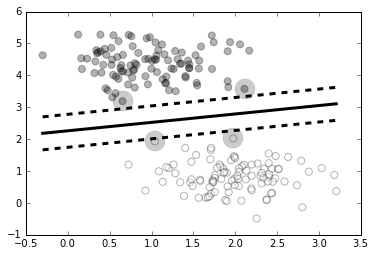

In [6]:
xi = np.linspace(X[:,0].min(),X[:,0].max(),100)

fig,ax=subplots()
ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='gray',marker='o',alpha=.3)
ax.plot(sv.support_vectors_[:,0],sv.support_vectors_[:,1],'ko',markersize=20,alpha=.2)
xi = np.linspace(X[:,0].min(),X[:,0].max(),100)
ax.plot(xi,-sv.coef_[0,0]/sv.coef_[0,1]*xi- sv.intercept_/sv.coef_[0,1],'k',lw=3.)
margin = np.linalg.norm(sv.coef_)
ax.plot(xi,-sv.coef_[0,0]/sv.coef_[0,1]*xi- (sv.intercept_+margin/2.)/sv.coef_[0,1],'--k',lw=3.)
ax.plot(xi,-sv.coef_[0,0]/sv.coef_[0,1]*xi- (sv.intercept_-margin/2.)/sv.coef_[0,1],'--k',lw=3.)

In [7]:
X, y = make_blobs(n_samples=50, centers=2, n_features=2,
                  cluster_std=1,random_state=0)

gamma  2.13856955868
8


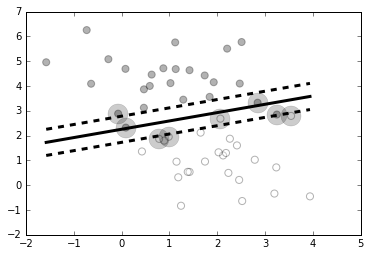

In [8]:
draw_margins(sv,X,y)

gamma  2.49629745752
16


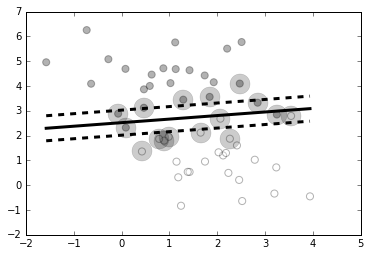

In [9]:
sv = SVC(kernel='linear',C=.100)
draw_margins(sv,X,y)

gamma  2.27060079411
38
gamma  2.13856955868
8
gamma  1.86306442873
5
gamma  2.22437392654
4


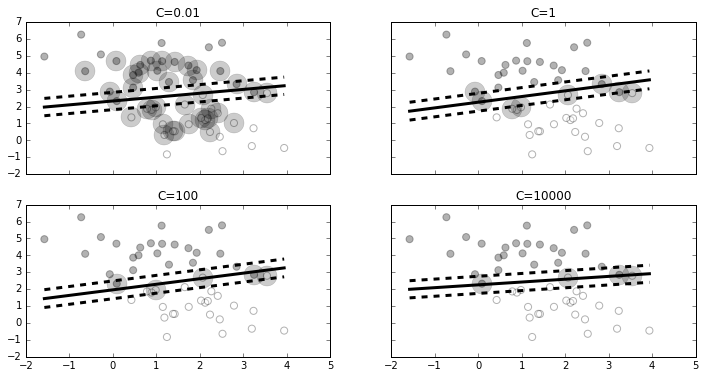

In [10]:
fig,axs = subplots(2,2,sharex=True,sharey=True)
fig.set_size_inches((12,6))
sv = SVC(kernel='linear',C=.0100)
draw_margins(sv,X,y,ax=axs[0,0])
axs[0,0].set_title('C=0.01')
sv = SVC(kernel='linear',C=1)
draw_margins(sv,X,y,ax=axs[0,1])
axs[0,1].set_title('C=1')
sv = SVC(kernel='linear',C=100)
draw_margins(sv,X,y,ax=axs[1,0])
axs[1,0].set_title('C=100')
sv = SVC(kernel='linear',C=10000)
draw_margins(sv,X,y,ax=axs[1,1])
axs[1,1].set_title('C=10000')
# axs[1,1].set_aspect(1)

In [11]:
sv = SVC(kernel='rbf',C=1000)
sv.fit(X,y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

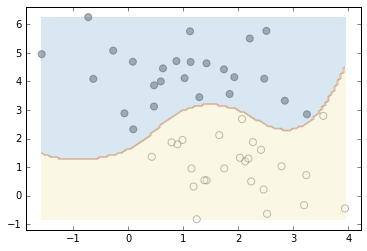

In [12]:
xi = np.linspace(X[:,0].min(),X[:,0].max(),100)
yi = np.linspace(X[:,1].min(),X[:,1].max(),100)

fig,ax=subplots()
ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='gray',marker='o',alpha=.3)
# ax.plot(sv.support_vectors_[:,0],sv.support_vectors_[:,1],'ko',markersize=20,alpha=.2)

Xi,Yi = np.meshgrid(xi,yi)
Zi=sv.predict(np.c_[Xi.ravel(),Yi.ravel()]).reshape(Xi.shape)

ax.contourf(Xi,Yi,Zi, cmap=cm.Paired, alpha=0.2);

## Kernel polynomial regression example

[NumPy / SciPy Recipes for Data Science:
Kernel Least Squares Optimization (1)](http://www.researchgate.net/profile/Christian_Bauckhage/publication/274374009_NumPy__SciPy_Recipes_for_Data_Science_Kernel_Least_Squares_Optimization_%281%29/links/551c51480cf2fe6cbf78ea13.pdf)

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

xi = np.linspace(0,1,100)[:,None]
# sample chirp randomly
xin= np.sort(np.random.choice(xi.flatten(),20,replace=False))[:,None]
# create sampled waveform
y = cos(2*pi*(xin+xin**2))
# create full waveform for reference
yi = cos(2*pi*(xi+xi**2))

# create polynomial features
qfit = PolynomialFeatures(degree=5) # quadratic
Xq = qfit.fit_transform(xin)
# reformat input as polynomial
Xiq = qfit.fit_transform(xi)

lr=LinearRegression() # create linear model 
lr.fit(Xq,y) # fit linear model


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

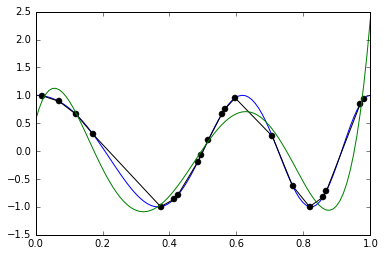

In [14]:
fig,ax=subplots()
ax.plot(xi,yi)
ax.plot(xin,y,'o-k')
ax.plot(xi,lr.predict(Xiq))

In [15]:
# linear kernel
def polyKernelMat(X, p=3): return (np.dot(X, X.T) + 1.)**p
def polyKernelVec(x, X, p=3): return (np.dot(x, X.T) + 1.)**p

In [16]:
Xin=np.vander(xin.flat,2)
Xi = np.vander(xi.flat,2)

In [17]:
K = polyKernelMat(Xin,3)+np.identity(Xin.shape[0])
KIy = linalg.inv(K).dot(y)

In [18]:
o=[]
yTest = np.zeros(Xi.shape[0])
for i in range(Xi.shape[0]):
    k = polyKernelVec(Xi[i,:], Xin, 3)
    yTest[i] = np.dot(k, KIy)

In [19]:
from IPython.display import Math
import sympy as S

In [20]:
x = S.MatrixSymbol('x',3,1)
y = S.MatrixSymbol('y',3,1)
a = S.symbols('alpha',real=True)
kern = (x.T*y+a * S.Identity(1))**2

In [21]:
Math(S.latex(S.Matrix(kern)))

<IPython.core.display.Math object>

In [33]:
Math(S.latex(kern.as_explicit()[0,0]+a))

<IPython.core.display.Math object>

In [25]:
(a * S.Identity(1)).as_explicit()

Matrix([[alpha]])